In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sklearn as sk
import statsmodels.api as sm
import matplotlib as mpl

In [19]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])


In [4]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.61e-61
Time:                        22:45:50   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

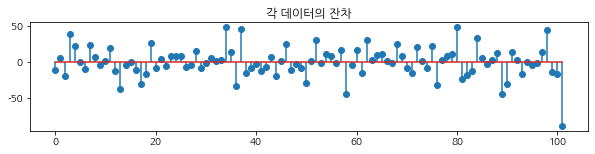

In [5]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("각 데이터의 잔차")
plt.show()

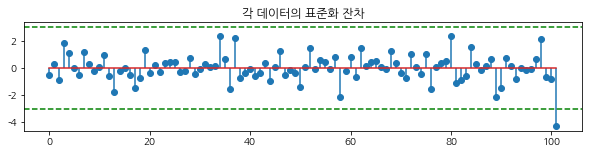

In [6]:
plt.figure(figsize=(10,2))
plt.stem(result.resid_pearson)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.title('각 데이터의 표준화 잔차')
plt.show()

## Cook's Distance

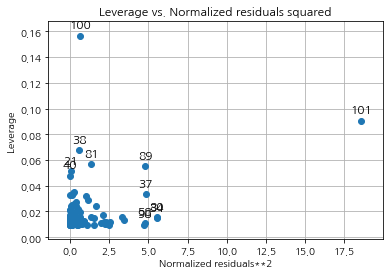

In [7]:
sm.graphics.plot_leverage_resid2(result)
plt.grid('Ture')
plt.show()

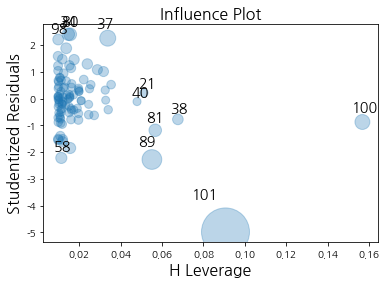

In [8]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

### Fox recommentation

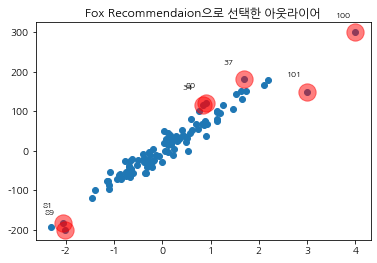

In [16]:
from statsmodels.graphics import utils

influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("Fox Recommendaion으로 선택한 아웃라이어")
plt.show()

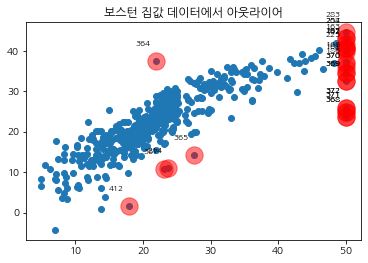

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]


# MEDV = 50 제거
idx = np.hstack([idx, np.where(boston.target == 50)[0]])


ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(dfy.MEDV[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("보스턴 집값 데이터에서 아웃라이어")
plt.show()


In [34]:
idx2 = list(set(range(len(dfX))).difference(idx))
dfX = dfX.iloc[idx2, :].reset_index(drop=True)
dfy = dfy.iloc[idx2, :].reset_index(drop=True)
model_boston2 =sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          2.41e-161
Time:                        23:31:37   Log-Likelihood:                -1285.2
No. Observations:                 485   AIC:                             2598.
Df Residuals:                     471   BIC:                             2657.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8999      4.107      4.602      0.0